<a href="https://colab.research.google.com/github/JJungEEun/dacon/blob/main/%EC%86%8C%EB%93%9D%EC%98%88%EC%B8%A1%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C/%EC%86%8C%EB%93%9D%EC%98%88%EC%B8%A1%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터 불러오기

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

In [14]:
train = pd.read_csv("/content/drive/MyDrive/dacon/소득예측경진대회/data/train.csv")

In [15]:
train.head()

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,32,Private,309513,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
1,1,33,Private,205469,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
2,2,46,Private,149949,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
3,3,23,Private,193090,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
4,4,55,Private,60193,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K


id : 샘플 아이디

age : 나이

workclass : 일 유형

fnlwgt : CPS(Current Population Survey) 가중치

education : 교육수준

education.num : 교육수준 번호

marital.status : 결혼 상태

occupation : 직업

relationship : 가족관계

race : 인종

sex : 성별

capital.gain : 자본 이익

capital.loss : 자본 손실

hours.per.week : 주당 근무시간

native.country : 본 국적

target : 소득

### 데이터 살펴보기

#### 결측치 확인

In [16]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train)

결측치가 있는 컬럼은: workclass 입니다
해당 컬럼에 총 1836 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: occupation 입니다
해당 컬럼에 총 1843 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: native.country 입니다
해당 컬럼에 총 583 개의 결측치가 존재합니다.


In [17]:
train[train.isna().sum(axis=1) > 0]

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
15081,15081,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
15082,15082,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
15083,15083,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,>50K
15084,15084,51,NaN,172175,Doctorate,16,Never-married,NaN,Not-in-family,White,Male,0,2824,40,United-States,>50K
15085,15085,22,Private,119592,Assoc-acdm,12,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,2824,40,NaN,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17475,17475,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
17476,17476,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
17477,17477,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
17478,17478,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [18]:
print(train['workclass'].unique())
print(train['occupation'].unique())
print(train['native.country'].unique())

['Private' 'State-gov' 'Local-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Federal-gov' 'Without-pay' nan 'Never-worked']
['Craft-repair' 'Exec-managerial' 'Adm-clerical' 'Prof-specialty'
 'Machine-op-inspct' 'Other-service' 'Sales' 'Farming-fishing'
 'Transport-moving' 'Handlers-cleaners' 'Tech-support' 'Protective-serv'
 'Priv-house-serv' 'Armed-Forces' nan]
['United-States' 'Poland' 'Mexico' 'Ireland' 'Guatemala'
 'Dominican-Republic' 'Greece' 'El-Salvador' 'Portugal' 'Canada'
 'Philippines' 'India' 'Italy' 'England' 'Jamaica' 'Columbia' 'South'
 'Vietnam' 'Cuba' 'Laos' 'Hong' 'Haiti' 'Germany' 'Yugoslavia' 'Ecuador'
 'France' 'Puerto-Rico' 'Outlying-US(Guam-USVI-etc)' 'Taiwan' 'China'
 'Japan' 'Honduras' 'Peru' 'Nicaragua' 'Hungary' 'Cambodia' 'Iran'
 'Trinadad&Tobago' 'Thailand' 'Scotland' 'Holand-Netherlands' nan]


해당 결측치는 Null값이다. (일유형, 직업, 국적)

1. 범주형 데이터: 최빈값
2. 일 유형, 직업: 나이,  교육 수준이 비슷한 사람들끼리 유사할 가능성 높음 -> 최빈값
3. 국적: ?
4. 데이터 제거도 고려

---

모든 데이터 값이 범주형이고 특별한 패턴이 보이지 않아 **결측치 제거**

In [19]:
def handle_na(data, missing_col):
    temp = data.copy()
    for col, dtype in missing_col:
        if dtype == 'O':
            # 범주형 feature가 결측치인 경우 해당 행들을 삭제해 주었습니다.
            temp = temp.dropna(subset=[col])
    return temp

train = handle_na(train, missing_col)

# 결측치 처리가 잘 되었는지 확인해 줍니다.
missing_col = check_missing_col(train)     

결측치가 존재하지 않습니다


In [20]:
train.shape

(15081, 16)

### EDA

#### 클래스 분포 **확인**

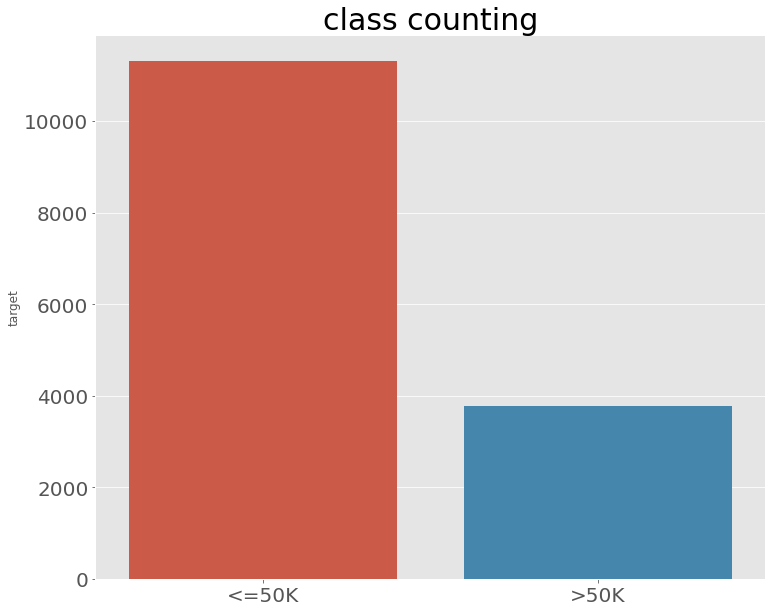

In [25]:
counted_values = train['target'].value_counts()
plt.style.use('ggplot')
plt.figure(figsize=(12, 10))
plt.title('class counting', fontsize = 30)
value_bar_ax = sns.barplot(x=counted_values.index, y=counted_values)
value_bar_ax.tick_params(labelsize=20)

- 데이터 불균형 심한 편
- 3:1 비율

#### 범주형 데이터

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15081 entries, 0 to 15080
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              15081 non-null  int64 
 1   age             15081 non-null  int64 
 2   workclass       15081 non-null  object
 3   fnlwgt          15081 non-null  int64 
 4   education       15081 non-null  object
 5   education.num   15081 non-null  int64 
 6   marital.status  15081 non-null  object
 7   occupation      15081 non-null  object
 8   relationship    15081 non-null  object
 9   race            15081 non-null  object
 10  sex             15081 non-null  object
 11  capital.gain    15081 non-null  int64 
 12  capital.loss    15081 non-null  int64 
 13  hours.per.week  15081 non-null  int64 
 14  native.country  15081 non-null  object
 15  target          15081 non-null  object
dtypes: int64(7), object(9)
memory usage: 2.0+ MB


In [27]:
train_categori = train.drop(['id', 'age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week'],axis = 1) #범주형이 아닌 피쳐 drop
train_categori.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,target
0,Private,Assoc-acdm,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
1,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
2,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
3,Private,Bachelors,Never-married,Adm-clerical,Own-child,White,Female,United-States,<=50K
4,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,United-States,<=50K


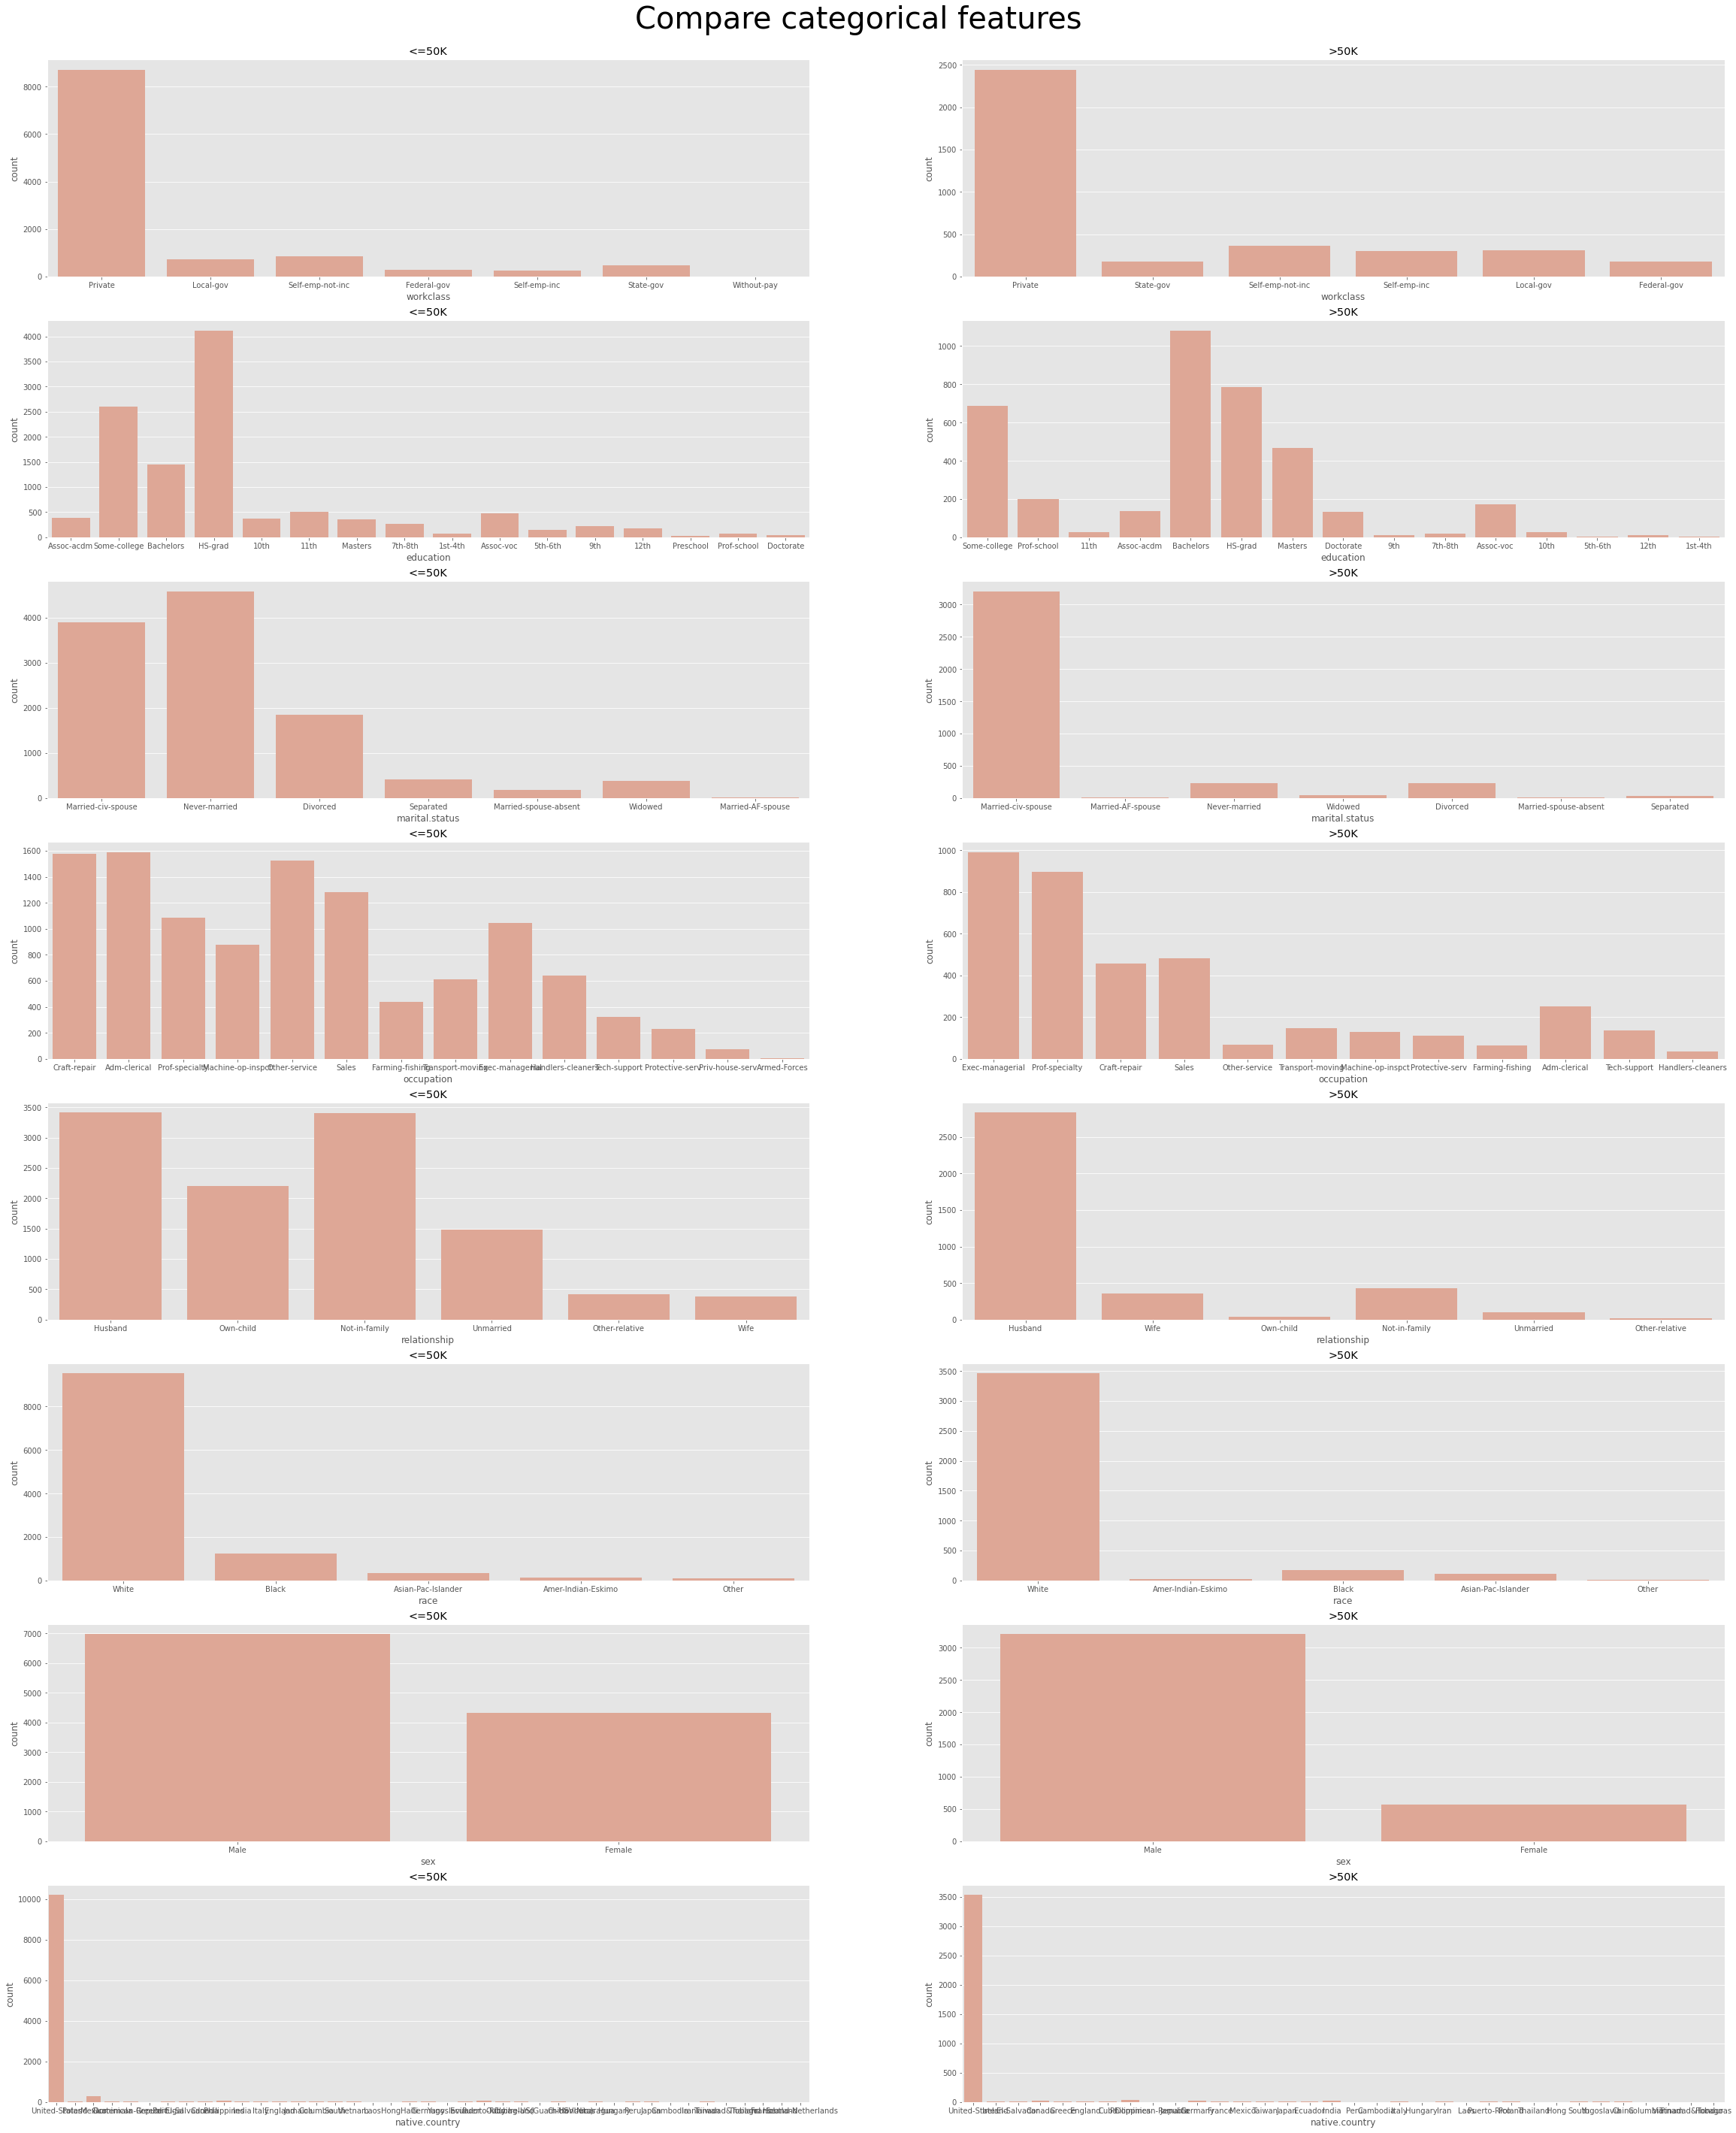

In [28]:
# 범주형 데이터 분포 
def visualize(axx, field, num): ##그래프를 그리기 위한 메소드
    sns.countplot(train_categori.columns[num], data= train_categori[train_categori['target'] == field],  color='#eaa18a', ax = axx) # countplot을 이용하여 그래프를 그려줍니다.
    axx.set_title(field)

figure, ((ax1,ax2),(ax3,ax4), (ax5, ax6),(ax7, ax8), (ax9, ax10),
         (ax11,ax12),(ax13,ax14), (ax15, ax16))  = plt.subplots(nrows=8, ncols=2) ## 원하는 개수의 subplots 만들어주기
figure.set_size_inches(40, 50) #(w,h)
figure.suptitle('Compare categorical features', fontsize=40, y = 0.9)

k = 0 # 피쳐 수
j = 1 # 그래프 수
while k<8: 
    for i in range(0,2):
        visualize(eval(f'ax{j}'), train_categori['target'].unique()[i], k)
        j = j+1
    k = k+1

- workclass
  + 대부분 사기업 종사자
- education
  + 50k 이하: 고졸, 전문대, 학사 순
  + 50k 이상: 학사, 고졸, 전문대 순
- marital status(결혼 상태)
  + 50k 이히: 미혼, 기혼, 이혼 순
  + 50k 이상: 기혼, 이혼, 미혼 순
- ocuuoation
  + 50k 이하: Adm-clerical / Craft-repair / Other Service
  + 50k 이상: Exec-managerial / Prof-specialty / Sales
- sex
  + 50k 이하: Male(약 7,000) / Female (약 4,500
  + 50k 이상:  Male(약 3,300) / Female (약 500)


#### 수치형 데이터

In [29]:
train_numeric = train[['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week', 'target']] #수치형 피쳐와 label인 target 추출
train_numeric.describe()

,age,fnlwgt,capital.gain,capital.loss,hours.per.week
count,15081.000000,1.508100e+04,15081.000000,15081.000000,15081.000000
mean,38.455673,1.897891e+05,1105.202772,85.466415,40.920828
std,13.158095,1.051112e+05,7489.760601,397.661418,12.018513
min,17.000000,1.882700e+04,0.000000,0.000000,1.000000
25%,28.000000,1.177460e+05,0.000000,0.000000,40.000000
50%,37.000000,1.782510e+05,0.000000,0.000000,40.000000
75%,47.000000,2.381880e+05,0.000000,0.000000,45.000000
max,90.000000,1.455435e+06,99999.000000,4356.000000,99.000000


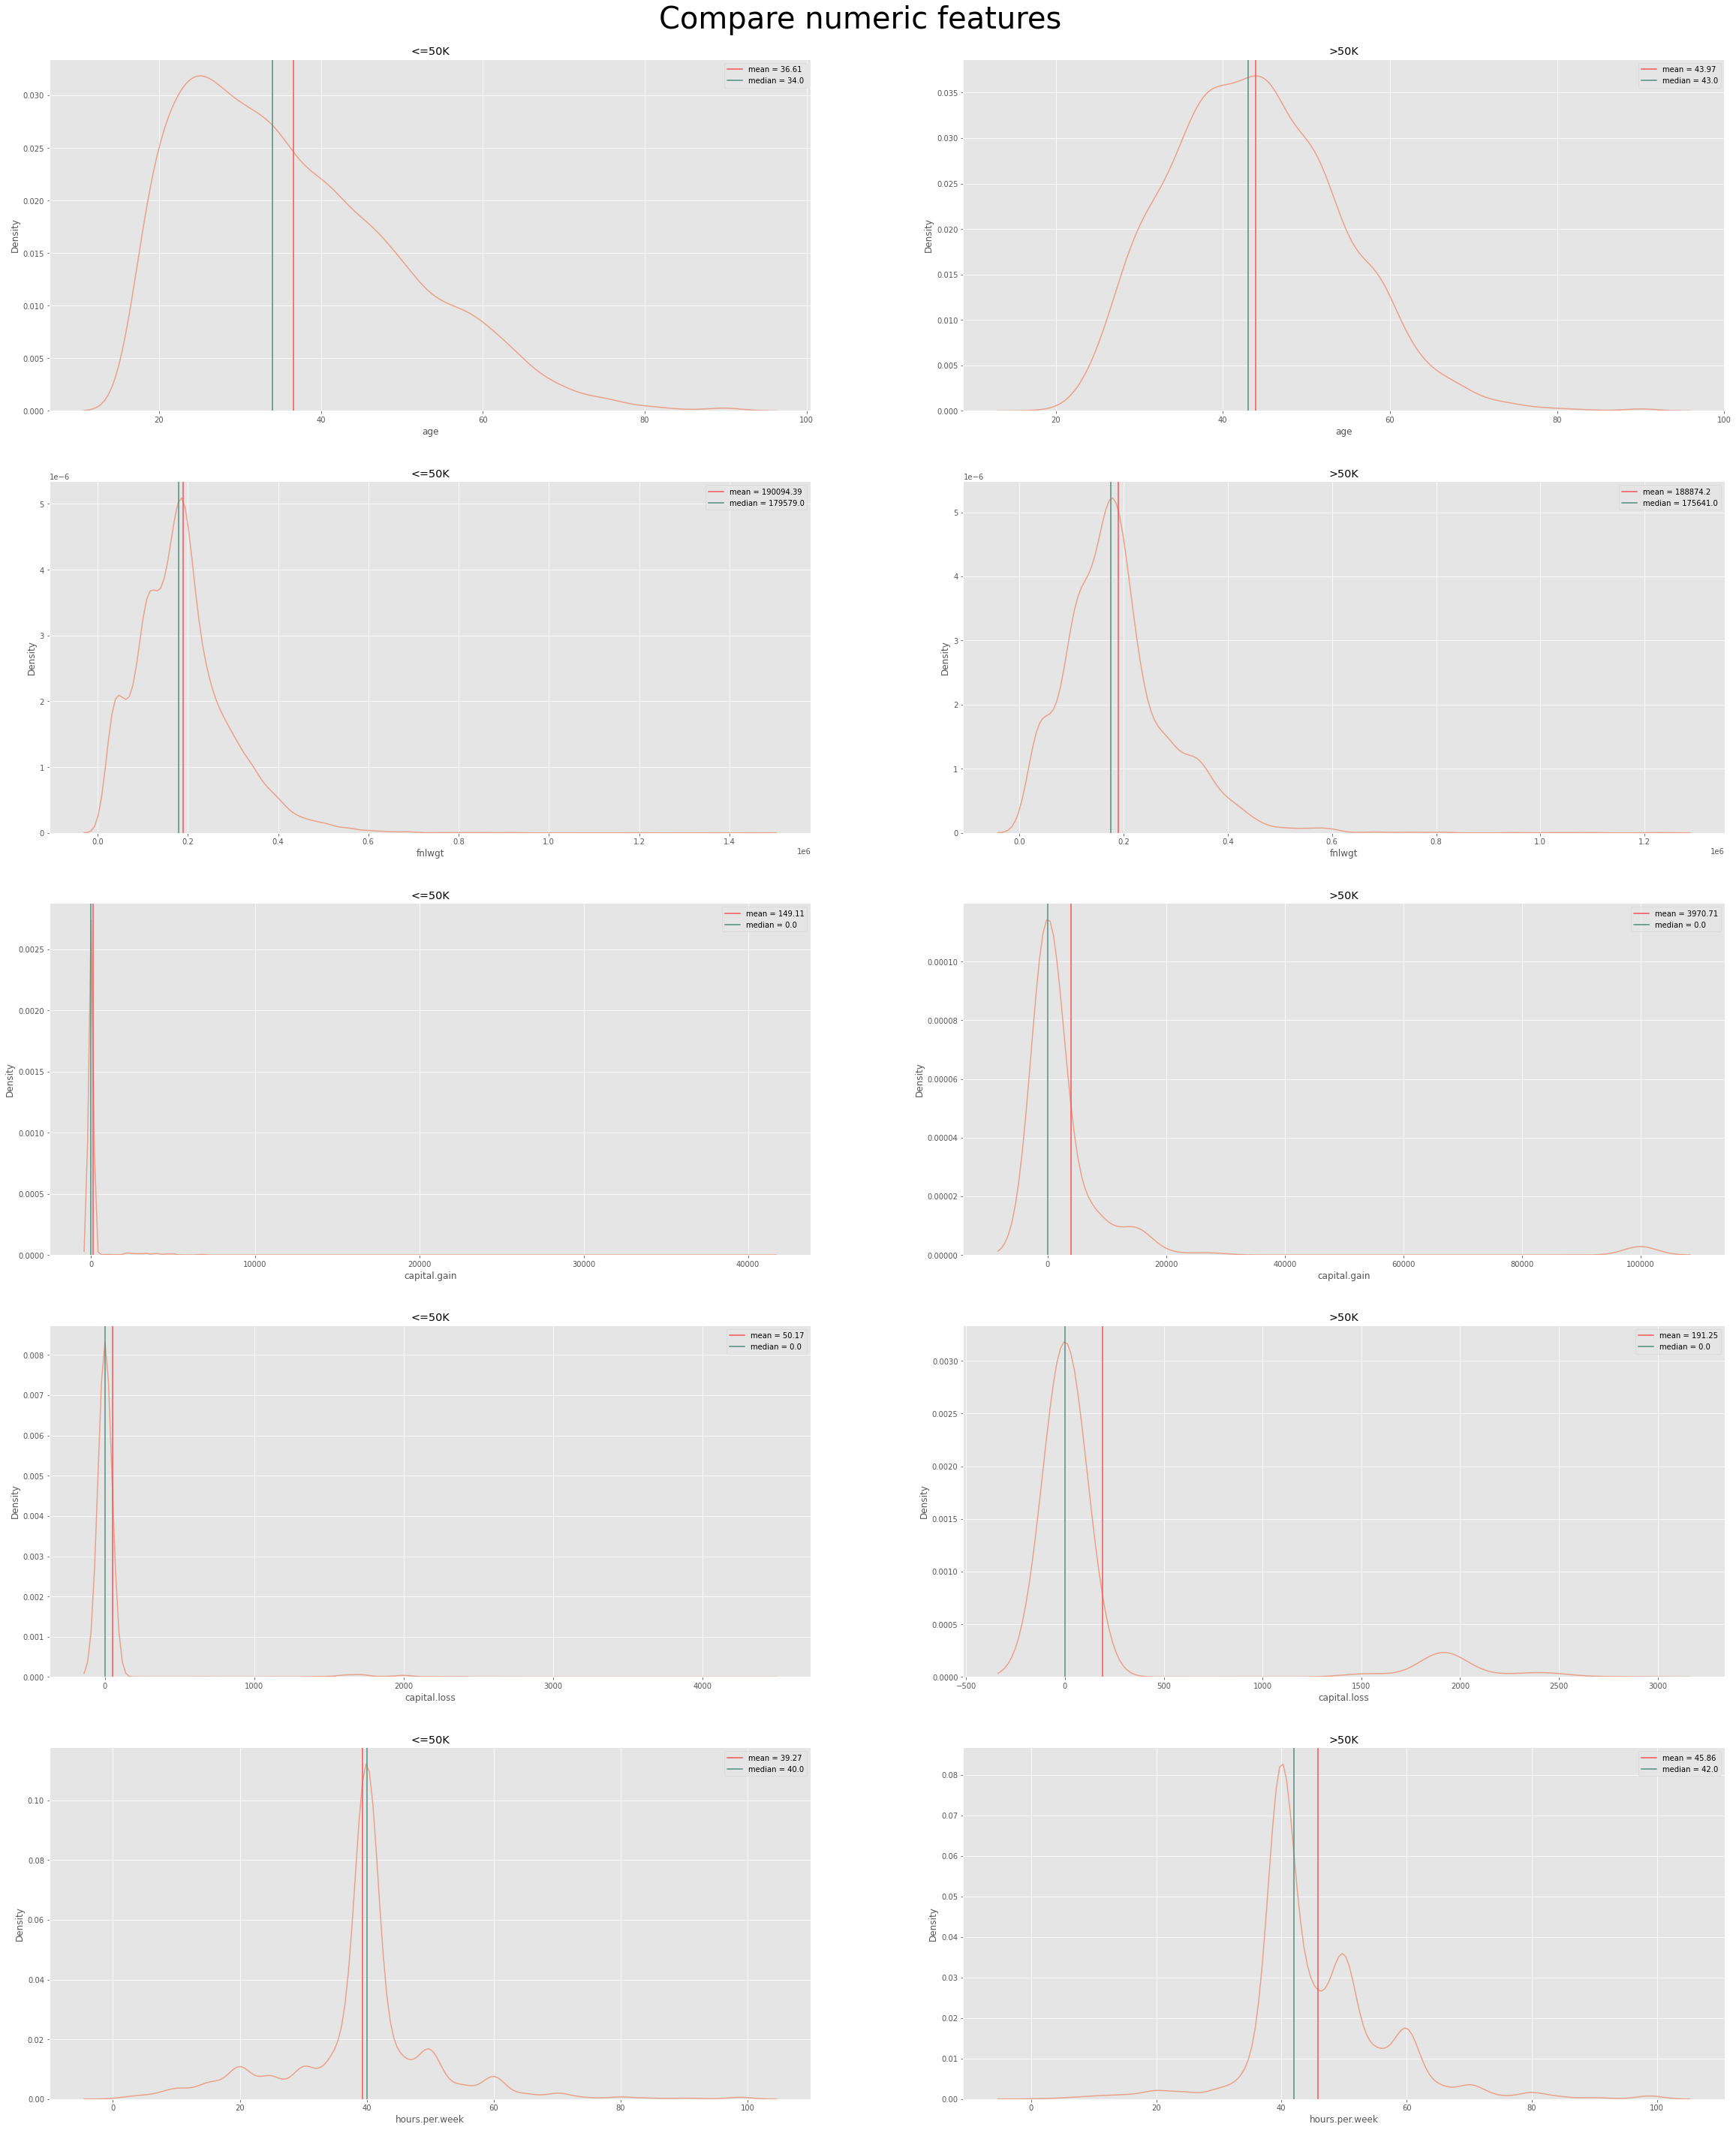

In [30]:
def visualize(axx, field, num):
    line = train_numeric[train_numeric['target'] == field] #메소드에서 target 클래스 추춣
    name = train_numeric[train_numeric['target'] == field][train_numeric.columns[num]].name #메소드에서 이름 추출
    sns.kdeplot(x = line[train_numeric.columns[num]],  data = train_numeric, ax = axx, color='#eaa18a') #countplot을 이용하여 그래프를 그려줍니다.
    axx.axvline(line.describe()[name]['mean'], c='#f55354', label = f"mean = {round(line.describe()[name]['mean'], 2)}") #mean 통계값을 표기해줍니다.
    axx.axvline(line.describe()[name]['50%'], c='#518d7d', label = f"median = {round(line.describe()[name]['50%'], 2)}") #median 통계값을 표기해줍니다.
    axx.legend()
    axx.set_title(field)

figure, ((ax1,ax2),(ax3,ax4), (ax5, ax6),(ax7, ax8), (ax9, ax10))  = plt.subplots(nrows=5, ncols=2) ##원하는 개수의 subplots 만들어주기
figure.set_size_inches(40, 50) #(w,h)
figure.suptitle('Compare numeric features', fontsize=40, y = 0.9)

k = 0 # 피쳐 수
j = 1 # 그래프 수
while k<5:
    for i in range(0,2):
        visualize(eval(f'ax{j}'), train_numeric['target'].unique()[i], k)
        j = j+1
    k = k+1

- age
  + 50k이상보다 50k이하가 나이가 더 많음
- hours.per.week
  + 50k 이상: 비교적 높은 주당 업무시간 수요
  + 40시간을 기준
- mean값을 보면 capital.gain, capital.loss, hours.per.week이 50k에서 더 높은 수치를 가지고 있음

---
- **age, capital.gain, capital.loss, hours.per.week**

### 상관관계


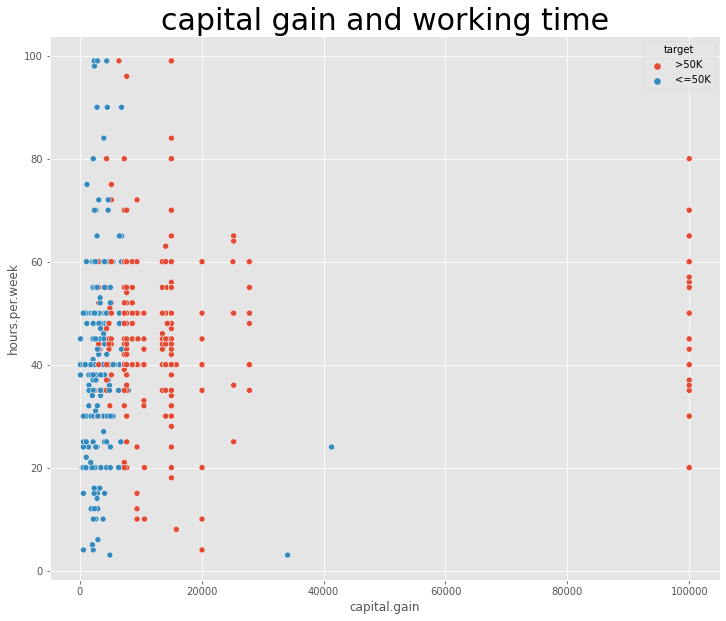

In [32]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 10))
plt.title('capital gain and working time', fontsize = 30)
sns.scatterplot(x = 'capital.gain',  y= 'hours.per.week', hue= 'target', data= train[train['capital.gain'] > 0]) #산포도를 확실하게 차이나도록  시각화 해주기 위하여 capital.gain에서 0값을 제외

- capital.gain이 커질 수록 50k이상이 많음
- 비교적 hours.per.week.가 작을 수록 50k 이하 많음
- **근무 시간이 많고 자본의 이익이 많은 집합일수록 수입이 많음**

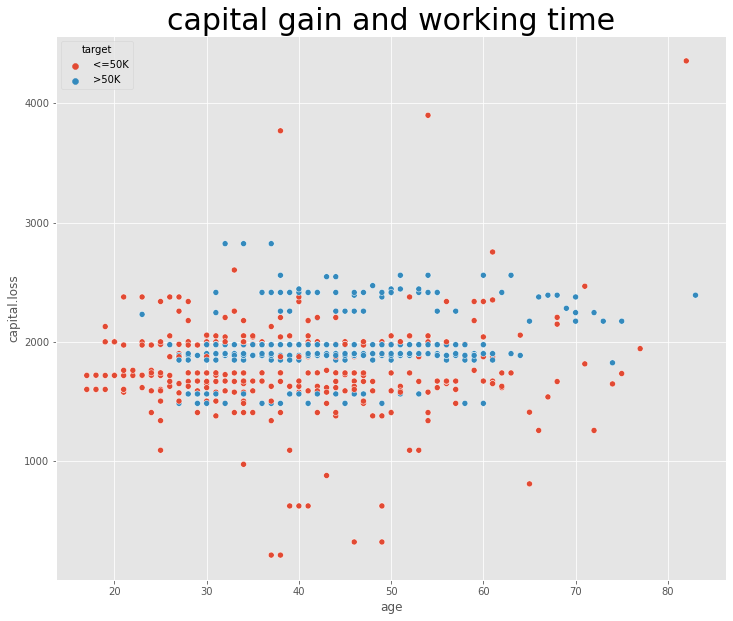

In [33]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 10))
plt.title('capital gain and working time', fontsize = 30)
sns.scatterplot(x = 'age',  y= 'capital.loss', hue= 'target', data= train[train['capital.loss'] > 0]) #산포도를 확실하게 차이나도록  시각화 해주기 위하여 capital.loss에서 0값을 제외

- age가 25미만 / 65세 이상: 50k 이상
- capital.loss 적은 곳: 50k 이상
- **25-65세 사이 자본의 손실이 많은 집합이 수익이 많을 것**


수치형 변수간 상관도 낮음 

### 모델링

#### 라벨 인코딩

In [6]:
#라벨인코딩을 하기 위함 dictionary map 생성 함수
def make_label_map(dataframe):
    label_maps = {}
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            label_map = {'unknown':0}
            for i, key in enumerate(dataframe[col].unique()):
                label_map[key] = i  #새로 등장하는 유니크 값들에 대해 1부터 1씩 증가시켜 키값을 부여해줍니다.
            label_maps[col] = label_map
    return label_maps

# 각 범주형 변수에 인코딩 값을 부여하는 함수
def label_encoder(dataframe, label_map):
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            dataframe[col] = dataframe[col].map(label_map[col])
            #dataframe[col] = dataframe[col].fillna(label_map[col]['unknown']) #혹시 모를 결측값은 unknown의 값(0)으로 채워줍니다.
    return dataframe

train = label_encoder(train, make_label_map(train))

#### 모델링

In [7]:
!pip install pycaret

     |████████████████████████████████| 320 kB 15.6 MB/s 
     |████████████████████████████████| 2.0 MB 49.7 MB/s 
     |████████████████████████████████| 16.8 MB 785 kB/s 
     |████████████████████████████████| 1.7 MB 62.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 4.9 MB/s 
     |████████████████████████████████| 261 kB 53.1 MB/s 
     |████████████████████████████████| 6.8 MB 46.8 MB/s 
     |████████████████████████████████| 118 kB 56.0 MB/s 
     |████████████████████████████████| 1.3 MB 40.9 MB/s 
     |████████████████████████████████| 88 kB 7.6 MB/s 
     |████████████████████████████████| 167 kB 66.7 MB/s 
     |████████████████████████████████| 303 kB 48.8 MB/s 
     |████████████████████████████████| 3.1 MB 41.4 MB/s 
     |████████████████████████████████| 690 kB 50.2 MB/s 
     |█████████████████

In [9]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [11]:
!pip install pycaret

In [12]:
from pycaret.classification import *
exp_101=setup(data=train, target='target', session_id=123,fold_shuffle=True)

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:11:25
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
id,ID Column
age,Numeric
workclass,Categorical
fnlwgt,Numeric
education,Categorical
education.num,Categorical
marital.status,Categorical
occupation,Categorical
relationship,Categorical
race,Categorical


KeyboardInterrupt: ignored

In [ ]:
best_model= compare_models()

In [ ]:
lgb = create_model('lightgbm')

In [ ]:
tuned_lgb= tune_model(lgb)

In [ ]:
final_lgb=finalize_model(tuned_lgb)
final_lgb

In [ ]:
pred = predict_model(final_lgb, data=test)